# NASDAQ - AT&T, T-Mobile, Verizon

#### CHECKLIST:

> Use Pandas to clean and format your dataset or datasets. 

> Create a Jupyter notebook describing the data exploration and cleanup process.

> Create a Jupyter notebook illustrating the final data analysis.

> Use Matplotlib to create 6 to 8 visualizations of your data <<<<
(ideally, at least 2 visualizations per “question” that you ask your data).

> Save PNG images of your visualizations to distribute to the class and instructional team—and for inclusion in your presentation.

Create a write-up summarizing your major findings. This should include a heading for each “question” that you asked your data as well as a short description of your findings and any relevant plots.

Bonus
> Use at least one API—if you can find one with data pertinent to your primary research questions.<<<<


# Importing Libraries

In [ ]:
!pip install plotly #for the candlestick graph

In [147]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

import plotly.graph_objs as go


# Applying the API

In [148]:
# Define the API URL with your API key
api_url = 'https://data.nasdaq.com/api/v3/datasets/WIKI/T.csv'

# Set the API key as a query parameter
params = {'API_KEYS': 'API_KEYS'}

# Make a GET request to the API URL with the API key as a parameter
response = requests.get(api_url, params=params)

# Check that the request was successful (status code 200)
if response.status_code == 200:
    # Write the content to a file
    with open('T.csv', 'wb') as f:
        f.write(response.content)
    # Read the file into a Pandas DataFrame
    att = pd.read_csv('T.csv')
else:
    print('Error: could not retrieve data from API.')

In [149]:
# Define the API URL with your API key
api_url2 = 'https://data.nasdaq.com/api/v3/datasets/WIKI/TMUS.csv'

# Set the API key as a query parameter
params2 = {'API_KEYS': 'API_KEYS'}

# Make a GET request to the API URL with the API key as a parameter
response2 = requests.get(api_url2, params=params2)

# Check that the request was successful (status code 200)
if response2.status_code == 200:
    # Write the content to a file
    with open('TMUS.csv', 'wb') as f:
        f.write(response2.content)
    # Read the file into a Pandas DataFrame
    tm = pd.read_csv('TMUS.csv')
else:
    print('Error: could not retrieve data from API.')

In [150]:
# Define the API URL with your API key
api_url3 = 'https://data.nasdaq.com/api/v3/datasets/WIKI/VZ.csv'

# Set the API key as a query parameter
params3 = {'API_KEYS': 'API_KEYS'}

# Make a GET request to the API URL with the API key as a parameter
response3 = requests.get(api_url3, params=params3)

# Check that the request was successful (status code 200)
if response3.status_code == 200:
    # Write the content to a file
    with open('VZ.csv', 'wb') as f:
        f.write(response3.content)
    # Read the file into a Pandas DataFrame
    vz = pd.read_csv('VZ.csv')
else:
    print('Error: could not retrieve data from API.')

# Importing Datasets

In [151]:
att = pd.read_csv("T.csv")
tm = pd.read_csv("TMUS.csv")
vz = pd.read_csv("VZ.csv")

In [152]:
att["Date"] = pd.to_datetime(att['Date'])
tm["Date"] = pd.to_datetime(tm['Date'])
vz["Date"] = pd.to_datetime(vz['Date'])

In [153]:
# Combining the graphs into one in case it will be needed later

t_mobile1 = pd.read_csv('Output_data/TMUS.csv', delimiter=',')
att1 = pd.read_csv('Output_data/WIKI-T.csv', delimiter=',')
verizon1 = pd.read_csv('Output_data/VZ.csv', delimiter=',')

# Convert the date column to datetime object
t_mobile1['Date'] = pd.to_datetime(t_mobile1['Date'])
att1['Date'] = pd.to_datetime(att1['Date'])
verizon1['Date'] = pd.to_datetime(verizon1['Date'])

# Add 'level_0' column to each dataframe
t_mobile1['level_0'] = 'T-Mobile'
att1['level_0'] = 'AT&T'
verizon1['level_0'] = 'Verizon'


# Merge the three dataframes together
combined_df = pd.concat([att1, t_mobile1, verizon1], keys=['AT&T', 'T-Mobile', 'Verizon'])

# Add a Quarter column to the dataframe
combined_df['Quarter'] = combined_df['Date'].dt.quarter
combined_df['Quarters'] = combined_df['Date'].dt.year.astype(str) + '-Q' + combined_df['Quarter'].astype(str)

## Viewing and Cleaning the Data

In [154]:
combined_df = combined_df.drop(['Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume' , 'Unnamed: 0'], axis=1)
att = att.drop(['Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume' ], axis=1)
tm = tm.drop(['Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume' ], axis=1)
vz = vz.drop(['Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume' ], axis=1)


In [155]:
combined_df

Date   Open     High    Low  Close      Volume  \
AT&T    0    2018-03-27  34.85  35.2000  34.69  34.90  33198184.0   
        1    2018-03-26  35.06  35.2866  34.44  34.69  31281785.0   
        2    2018-03-23  35.37  35.9900  34.55  34.70  34260415.0   
        3    2018-03-22  35.95  36.0400  35.36  35.37  28063362.0   
        4    2018-03-21  36.34  36.5000  36.00  36.00  16776049.0   
...                 ...    ...      ...    ...    ...         ...   
Verizon 8653 1983-11-28  68.50  68.5000  66.75  67.00    295975.0   
        8654 1983-11-25  69.62  69.7500  68.87  68.87    221475.0   
        8655 1983-11-23  70.00  70.2500  69.25  69.62    143988.0   
        8656 1983-11-22  70.25  71.2500  69.87  70.00    333338.0   
        8657 1983-11-21  70.62  70.7500  65.62  70.25    627575.0   

              Ex-Dividend  level_0  Quarter Quarters  
AT&T    0             0.0     AT&T        1  2018-Q1  
        1             0.0     AT&T        1  2018-Q1  
        2             0.0     AT&T        1  2018-Q1  
        3             0.0     AT&T        1  2018-Q1  
        4             0.0     AT&T        1  2018-Q1  
...                   ...      ...      ...      ...  
Verizon 8653          0.0  Verizon        4  1983-Q4  
        8654          0.0  Verizon        4  1983-Q4  
        8655          0.0  Verizon        4  1983-Q4  
        8656          0.0  Verizon        4  1983-Q4  
        8657          0.0  Verizon        4  1983-Q4  

[19904 rows x 10 columns]

In [156]:
print(combined_df.isnull().sum())
print((combined_df == 0.0).any())

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
level_0        0
Quarter        0
Quarters       0
dtype: int64
Date           False
Open           False
High           False
Low            False
Close          False
Volume         False
Ex-Dividend     True
level_0        False
Quarter        False
Quarters       False
dtype: bool


##### We decided to clean the data up by removing these columns as they were repeats and didnt add anything new.

# Comparative Analyses: AT&T, T-Mobile and Verizon


##   - 1- How much did the stock volume fluctuate for each company?

### Volume

  Volume is the number of shares transactions between the open and close on a daily basis.
  
  Looking at volume over the lifetime of a company is beneficial because it provides us insight into the growth and health of the business. 
   
   We are able to: 
   -  Identify trends and volume patterns. If there are spikes or dips, it is useful insight to look into events in that time period
   - Observe the Market liquidity to see how easy it is to sell and buy the stock
   - Insight into investor sentiments. High volume indicates buying and selling opportunities. 

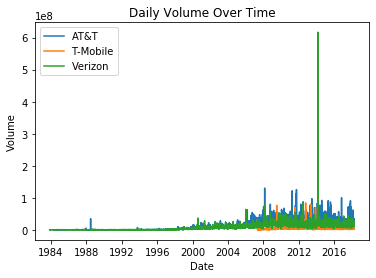

In [157]:
# Plotting to view the volume for each company
plt.plot(att1["Date"], att1["Volume"], label="AT&T")
plt.plot(t_mobile1["Date"], t_mobile1["Volume"], label="T-Mobile")
plt.plot(verizon1["Date"], verizon1["Volume"], label="Verizon")

plt.title("Daily Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()

plt.show()


### Analysis: Verizon has a massive spike in 2014 in its daily volume, we will look into this further later in the analysis

## -2- How did Price change over each companies lifetime?

### Price

Price of stock is the price of a single share. It is determined by calculating the company market capital divided by the number of shares

Stock price varies depending on the companies performance, industry trends and investor behavior.

With this, we are able to:

 - Indicate its current value to buyers and sellers.
 - Indicate the health of the company compared to others in the industry.
 - Identify stocks that are currently undervalued by the market.

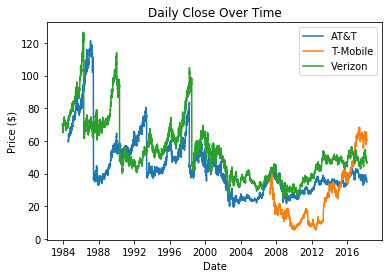

In [158]:
# Ploting the closing price for each company
plt.plot(att1["Date"], att1["Close"], label="AT&T")
plt.plot(t_mobile1["Date"], t_mobile1["Close"], label="T-Mobile")
plt.plot(verizon1["Date"], verizon1["Close"], label="Verizon")

plt.title("Daily Close Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

### Analysis: As we can see, T Mobiles data is limited to 2007-2018. Therefore, it is best to focus on the last 10 years of the data 

# -3- How did Stock Price change in the most recent years?

### Daily percent change in stock prices
provides insight into the markets trends and volatility. Allows investors to make informed decisions by seeing patterns in price changes 

In [159]:
data_08_18 = combined_df[(combined_df['Date'] >= '2008-01-01') & (combined_df['Date'] <= '2018-12-31')]

# Calculate the percent daily change in price for each company
data_08_18['Percent Daily Change Price'] = (data_08_18['Close'] - data_08_18['Open']) / data_08_18['Open'] * 100

# Print the new column
display(data_08_18[['Date', 'Close', 'Open', 'Percent Daily Change Price']])


/Users/madisubaiti/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Close   Open  Percent Daily Change Price
AT&T    0    2018-03-27  34.90  34.85                    0.143472
        1    2018-03-26  34.69  35.06                   -1.055334
        2    2018-03-23  34.70  35.37                   -1.894261
        3    2018-03-22  35.37  35.95                   -1.613352
        4    2018-03-21  36.00  36.34                   -0.935608
...                 ...    ...    ...                         ...
Verizon 2571 2008-01-08  41.99  43.30                   -3.025404
        2572 2008-01-07  43.35  42.91                    1.025402
        2573 2008-01-04  42.60  42.97                   -0.861066
        2574 2008-01-03  43.41  43.35                    0.138408
        2575 2008-01-02  43.21  43.90                   -1.571754

[7728 rows x 4 columns]

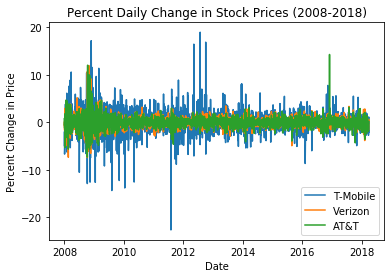

In [160]:
plt.plot(data_08_18[data_08_18['level_0'] == 'T-Mobile']['Date'], data_08_18[data_08_18['level_0'] == 'T-Mobile']['Percent Daily Change Price'], label='T-Mobile')
plt.plot(data_08_18[data_08_18['level_0'] == 'Verizon']['Date'], data_08_18[data_08_18['level_0'] == 'Verizon']['Percent Daily Change Price'], label='Verizon')
plt.plot(data_08_18[data_08_18['level_0'] == 'AT&T']['Date'], data_08_18[data_08_18['level_0'] == 'AT&T']['Percent Daily Change Price'], label='AT&T')

plt.title('Percent Daily Change in Stock Prices (2008-2018)')
plt.xlabel('Date')
plt.ylabel('Percent Change in Price')
plt.legend()
plt.show()

### Analysis: We notice here that T Mobile's price change fluctuations are severe. We are looking for a more linear or consistant positive percentage change - this indicates the stock price is increasing or staying at a competitive price in relation to industry. 

# - 4 - How did stock volume change in the most recent years?

### Daily Trading Volume in the last year given in the dataset (2017-2018)

     Daily trading volume allows us to see the number of shares of a stock that are traded in a given day
     This helps us assess the liquidity of the market for that stock
     
     High trading volume: Usually good, meaning there is an active market. Usually beneficial for traders that want to buy/sell shares. 
    
    Low trading volume: Not a good indicator. Could be a sign that there's not a lot of interest in the stock or people are not actively trading; this means shares increasingly more difficult to buy/sell at good prices. 

In [161]:
# calculate the daily trading volume for all
tm['Daily Trading Volume'] = tm['Volume'] / tm['Close']
att['Daily Trading Volume'] = att['Volume'] / att['Close']
vz['Daily Trading Volume'] = vz['Volume'] / vz['Close']
# display only the "Daily Trading Volume" column for each dataframe
display(tm[['Daily Trading Volume']].head())
display(att[['Daily Trading Volume']].head())
display(vz[['Daily Trading Volume']].head())



# Filtering the dataframes for dates between 2017 and 2018
start_date = '2017-01-01'
end_date = '2018-12-31'

t_mobile = tm[(tm['Date'] >= start_date) & (tm['Date'] <= end_date)]
t = att[(att['Date'] >= start_date) & (att['Date'] <= end_date)]
verizon = vz[(vz['Date'] >= start_date) & (vz['Date'] <= end_date)]

Daily Trading Volume
0          37461.451773
1          48893.597263
2          80650.954135
3          66846.546939
4          40538.360761

Daily Trading Volume
0         951237.363897
1         901752.234073
2         987331.844380
3         793422.731128
4         466001.361111

Daily Trading Volume
0         295816.867470
1         324064.287232
2         341973.795636
3         303132.167235
4         233488.874788

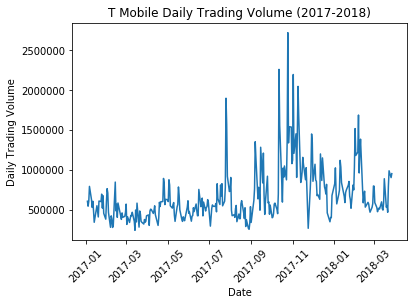

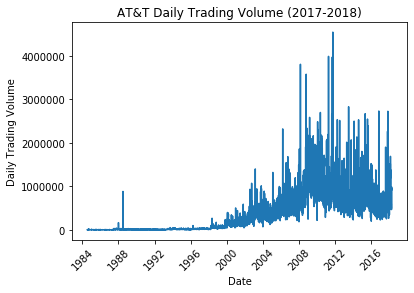

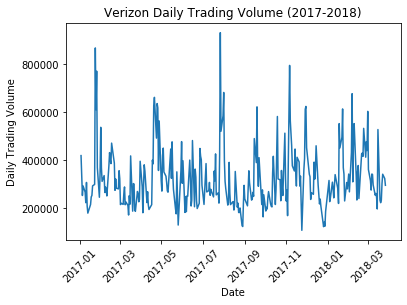

In [162]:
# Making a line chart for all three companies
plt.plot(t['Date'], t['Daily Trading Volume'])
plt.title('T Mobile Daily Trading Volume (2017-2018)')
plt.xlabel('Date')
plt.ylabel('Daily Trading Volume')
plt.xticks(rotation=45)
plt.show()

plt.plot(att['Date'], att['Daily Trading Volume'])
plt.title('AT&T Daily Trading Volume (2017-2018)')
plt.xlabel('Date')
plt.ylabel('Daily Trading Volume')
plt.xticks(rotation=45)
plt.show()

plt.plot(verizon['Date'], verizon['Daily Trading Volume'])
plt.title('Verizon Daily Trading Volume (2017-2018)')
plt.xlabel('Date')
plt.ylabel('Daily Trading Volume')
plt.xticks(rotation=45)
plt.show()

### Average daily trading volume from 2017-2018

    By comparing the average daily trading volume for the three companies, we will be able get an idea of how actively the stock is traded in the market and compare them to see which is being traded at a higher rate

In [163]:
# Calculate the average daily trading volume for each company
t_mobile_avg_vol = tm['Volume'].mean()
att_avg_vol = t['Volume'].mean()
verizon_avg_vol = vz['Volume'].mean()

# Print the results
print("T-Mobile's average daily trading volume for 2017-2018 was", t_mobile_avg_vol)
print("AT&T's average daily trading volume for 2017-2018 was", att_avg_vol)
print("Verizon's average daily trading volume for 2017-2018 was", verizon_avg_vol)

T-Mobile's average daily trading volume for 2017-2018 was 5099418.919753087
AT&T's average daily trading volume for 2017-2018 was 25438714.100323625
Verizon's average daily trading volume for 2017-2018 was 7391080.3091938095


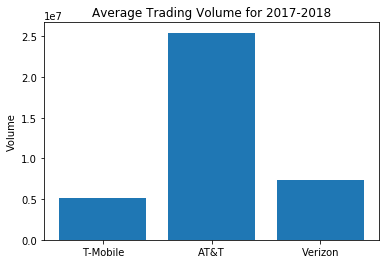

In [164]:
# Create a bar chart of the average trading volume
plt.bar(['T-Mobile', 'AT&T', 'Verizon'], [t_mobile_avg_vol, att_avg_vol, verizon_avg_vol])
plt.title('Average Trading Volume for 2017-2018')
plt.ylabel('Volume')
plt.show()

### Analysis: ATT is more liquid than the others. Investors can sell and buy these shares easier than the other two companies for this reason. 

###  ------------------------------------- Average High Per Year   

    The average high per year for each company gives us an idea of the range of stock prices over the years. It can also help in analyzing the fluctuations of the stock to see if buying or selling is good. However, looking at this data alone is not enough to make an investment decision, it is more valuable when coupled with the financial performances of the companies, market trends, and economic conditions.

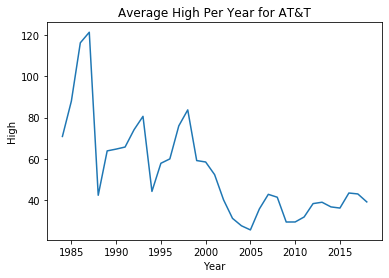

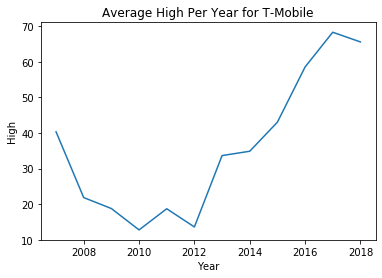

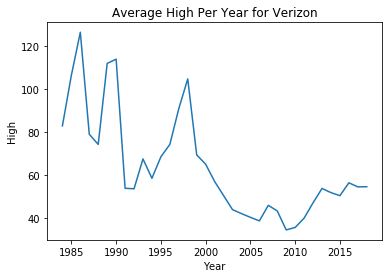

In [166]:
# Group the data by year and calculate the average value for each year
att_yearly = att.groupby(att['Date'].dt.year).max()

# Create a line plot of the yearly trend
plt.plot(att_yearly.index, att_yearly['Close'])
plt.xlabel('Year')
plt.ylabel('High')
plt.title('Average High Per Year for AT&T')
plt.show()

# Group the data by year and calculate the average value for each year
tm_yearly = tm.groupby(tm['Date'].dt.year).max()
# Create a line plot of the yearly trend
plt.plot(tm_yearly.index, tm_yearly['Close'])
plt.xlabel('Year')
plt.ylabel('High')
plt.title('Average High Per Year for T-Mobile')
plt.show()

# Group the data by year and calculate the average value for each year
vz_yearly = vz.groupby(att['Date'].dt.year).max()
# Create a line plot of the yearly trend
plt.plot(vz_yearly.index, vz_yearly['Close'])
plt.xlabel('Year')
plt.ylabel('High')
plt.title('Average High Per Year for Verizon')
plt.show()

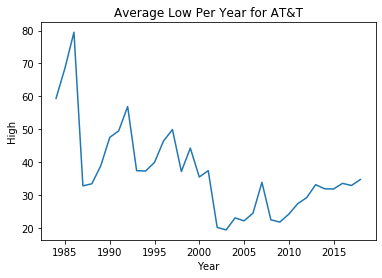

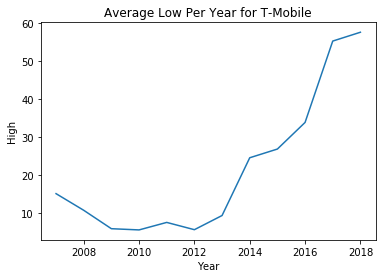

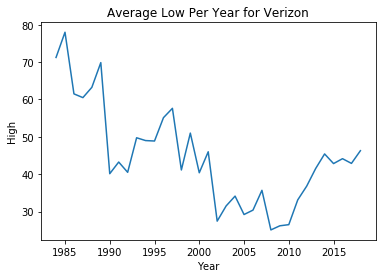

In [167]:
# Group the data by year and calculate the average value for each year
att_yearly = att.groupby(att['Date'].dt.year).min()

# Create a line plot of the yearly trend
plt.plot(att_yearly.index, att_yearly['Close'])
plt.xlabel('Year')
plt.ylabel('High')
plt.title('Average Low Per Year for AT&T')
plt.show()

# Group the data by year and calculate the average value for each year
tm_yearly = tm.groupby(tm['Date'].dt.year).min()
# Create a line plot of the yearly trend
plt.plot(tm_yearly.index, tm_yearly['Close'])
plt.xlabel('Year')
plt.ylabel('High')
plt.title('Average Low Per Year for T-Mobile')
plt.show()

# Group the data by year and calculate the average value for each year
vz_yearly = vz.groupby(att['Date'].dt.year).min()
# Create a line plot of the yearly trend
plt.plot(vz_yearly.index, vz_yearly['Close'])
plt.xlabel('Year')
plt.ylabel('High')
plt.title('Average Low Per Year for Verizon')
plt.show()

### As we see above it seems T-Mobile is missing data for the high from before 2007

In [168]:
#Make a new df to seperate the year from the date, group by year and company and calculate mean of High
avg_yr_high = combined_df.groupby([combined_df['Date'].dt.year, 'level_0'])['High'].mean().reset_index()

#  columns 
avg_yr_high.columns = ['Year', 'Company', 'Avg High']

avg_yr_high.head()


Year  Company   Avg High
0  1983  Verizon  67.395000
1  1984     AT&T  65.307913
2  1984  Verizon  73.554348
3  1985     AT&T  78.442063
4  1985  Verizon  89.577302

### we dont need to average high of each year to see the trends. This just helps justify the other analysis we have

# ----------------------------------------------------------------------------------------

## Quarterly Analysis

### -----------------------------------------Average Price per Quarter     Not sure we need this info either it doesnt give us any new info

    The importance of analysing the average mean price for each company is it gives us insight on how the companies are doing with their profits and revenues or if they are running into issues. We are able to see how the companies are doing financially comparitively to each other. 

In [169]:
# Seeing average closing price for all years for all companies

# New dataframe with columns for year, quarter, company, and mean price
quarterly_mean_price = combined_df[['Date', 'level_0', 'Close']].copy()
quarterly_mean_price['Year'] = quarterly_mean_price['Date'].dt.year
quarterly_mean_price['Quarter'] = quarterly_mean_price['Date'].dt.quarter
quarterly_mean_price.drop('Date', axis=1, inplace=True)
quarterly_mean_price.columns = ['Company', 'Price', 'Year', 'Quarter']

# Group by company, year, and quarter and calculate the mean price for each group
quarterly_mean_price = quarterly_mean_price.groupby(['Company', 'Year', 'Quarter']).mean().reset_index()

quarterly_mean_price.head()


Company  Year  Quarter      Price
0    AT&T  1984        3  62.921373
1    AT&T  1984        4  66.525000
2    AT&T  1985        1  72.289677
3    AT&T  1985        2  77.859206
4    AT&T  1985        3  81.786190

In [170]:
# Filtering to only see average closing for years 2016-2018

quart_avgprice_16 = quarterly_mean_price[(quarterly_mean_price['Year'] >= 2016) & (quarterly_mean_price['Year'] <= 2018)]
quart_avgprice_16


Company  Year  Quarter      Price
126      AT&T  2016        1  36.670820
127      AT&T  2016        2  39.401250
128      AT&T  2016        3  41.847031
129      AT&T  2016        4  39.068254
130      AT&T  2017        1  41.665968
131      AT&T  2017        2  39.028095
132      AT&T  2017        3  37.585714
133      AT&T  2017        4  36.197742
134      AT&T  2018        1  36.890678
170  T-Mobile  2016        1  37.749836
171  T-Mobile  2016        2  41.008984
172  T-Mobile  2016        3  45.909531
173  T-Mobile  2016        4  52.324365
174  T-Mobile  2017        1  61.472823
175  T-Mobile  2017        2  65.149206
176  T-Mobile  2017        3  62.710238
177  T-Mobile  2017        4  61.091613
178  T-Mobile  2018        1  62.619661
308   Verizon  2016        1  50.014262
309   Verizon  2016        2  51.869063
310   Verizon  2016        3  53.670312
311   Verizon  2016        4  49.978095
312   Verizon  2017        1  50.170323
313   Verizon  2017        2  46.581111
314   Verizon  2017        3  47.051111
315   Verizon  2017        4  49.235403
316   Verizon  2018        1  50.336610

In [171]:
#new dataframe showing the data for AT&T, T-Mobile, and Verizon
avgprice_16_sum = quart_avgprice_16[quart_avgprice_16['Company'].isin(['T-Mobile', 'AT&T', 'Verizon'])]

# Groupby company then sum of the price for each company
avgprice_16_sum = avgprice_16_sum.groupby('Company')['Price'].sum().reset_index()
avgprice_16_sum



Company       Price
0      AT&T  348.355552
1  T-Mobile  490.036258
2   Verizon  448.906291

#### Even though it seems T Mobile is making the more in sales compared to the rest, this alone does not provide us with any important inforamation to make an investment

# ----------------------------------------------------------------------------------------

# -5- Which company provides the higher and most consistent dividends for our investor?

### Quartarly Ex-dividends: from 2010-2018

    This is an important factor to consider, this tells investors how much the company gives in dividends to investors.

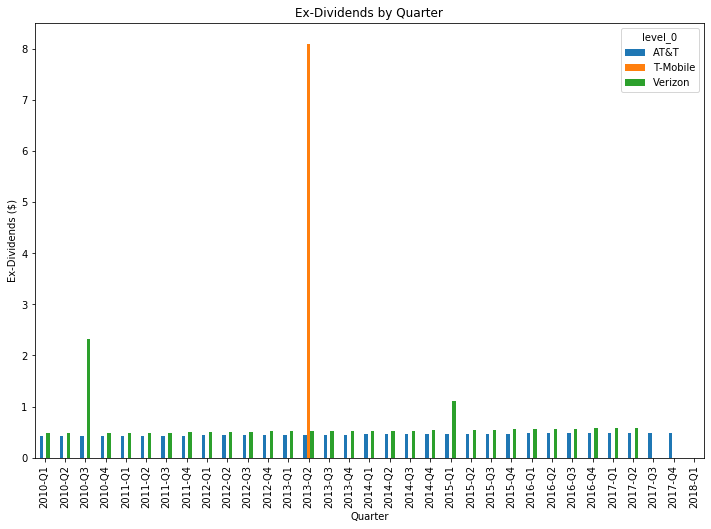

In [172]:
# Group the data by company, year, and quarter and calculate the sum of the ex-dividend amounts for each group
combined_df['Year'] = combined_df['Date'].dt.year
div_2010_2018 = combined_df[(combined_df['Date'] >= '2010-01-01') & (combined_df['Date'] <= '2018-12-31')]

ex_dividends = div_2010_2018.groupby(['level_0', 'Year', 'Quarter', 'Quarters'])['Ex-Dividend'].sum().reset_index()

# Plot the ex-dividend data
fig, ax = plt.subplots(figsize=(12, 8))
ex_dividends.pivot(index='Quarters', columns='level_0', values='Ex-Dividend').plot(kind='bar', ax=ax)
plt.title('Ex-Dividends by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Ex-Dividends ($)')
plt.show()

#### Analysis: T Mobile has such a high amount of cash on hand in Q2 2013. This is not a good sign of stability in dividends paid. Verison seems to be doing well in its overall divedend payments, however AT&T is the most consistant. 

## Dividend Yield

    To get the Dividend Yield, we would sum all the dividends of a given year and divide it by the mean of the     stock price of that year. 

    Dividend / Price = Dividend Yield

    Dividen Yield gives investors an idea of how much income they can expect to receive for each dollar invested in a particular stock.

In [173]:
# Filtering data to only see 2008-2018
div_10years = combined_df.loc[combined_df['Year'] >= 2008]

# Grouping data by company and year and aggregating the annual dividend and closing price
grouped_div = div_10years.groupby(['level_0', 'Year']).agg({'Ex-Dividend': 'sum', 'Close': 'mean'})

grouped_div = grouped_div.reset_index()

# Calculating the dividend yield for each company and year
grouped_div['Dividend Yield'] = (grouped_div['Ex-Dividend'] / grouped_div['Close']) * 100

# Selecting company, year and dividend yield columns
dividend_yield_data = grouped_div[['level_0', 'Year', 'Dividend Yield']]

dividend_yield_data.head()


level_0  Year  Dividend Yield
0    AT&T  2008        4.815299
1    AT&T  2009        6.401894
2    AT&T  2010        6.301388
3    AT&T  2011        5.857505
4    AT&T  2012        5.202490

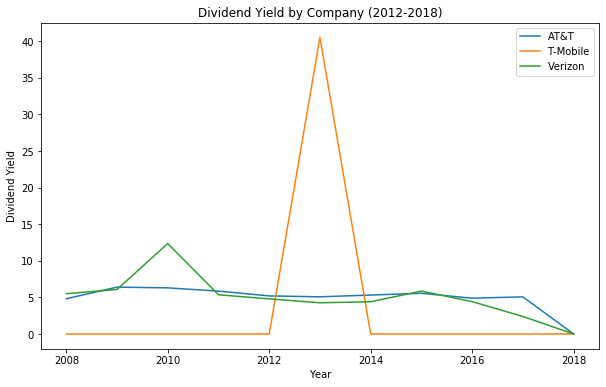

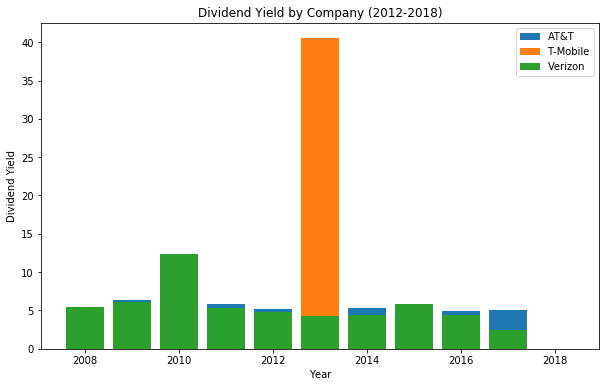

In [174]:
# Making a Line Graph to view the dividend yield

fig, ax = plt.subplots(figsize=(10, 6))

for company in dividend_yield_data['level_0'].unique():
    data = dividend_yield_data[dividend_yield_data['level_0'] == company]
    ax.plot(data['Year'], data['Dividend Yield'], label=company)

ax.set_xlabel('Year')
ax.set_ylabel('Dividend Yield')
ax.set_title('Dividend Yield by Company (2012-2018)')
ax.legend()

plt.show()

# Making a Bar Graph to compare the companies dividends

fig, ax = plt.subplots(figsize=(10, 6))

for company in dividend_yield_data['level_0'].unique():
    data = dividend_yield_data[dividend_yield_data['level_0'] == company]
    ax.bar(data['Year'], data['Dividend Yield'], label=company)

ax.set_xlabel('Year')
ax.set_ylabel('Dividend Yield')
ax.set_title('Dividend Yield by Company (2012-2018)')
ax.legend()
plt.savefig('Graphs/divyeild.png')
plt.show()



### Analysis: AT&T and Verizon make consistant dividend payments, this is important for an investor seeking to get a steady income from their investments. T Mobile on the other hand only paid their dividends in 2013 in one big lumpsum. This could mean that T Mobile usually reinvests its profits into the business or that it had a significantly profitably year in 2013 and decided to pay a high dividends payment. Looking at this alone would not give us much insight into the companies financial state however. It is important to look at the financial reports to get a better idea of how each company is doing. 

# -6- How does the time of year affect the stock value? Are there seasonal trends?

## Quartarly Analysis on the Percent Change in Stock Price 

     Comparing each company's quarterly percentage change in price can give us an insight on any patterns or seasonality trends
    It is useful for short term investment decisions if a company shows significant peaks in certain quarters

In [175]:
# AT&T 
# Filtering to only see 2008 Q2 to 2018 Q4
att_data = combined_df.loc[(combined_df['level_0'] == 'AT&T') & (combined_df['Year'] >= 2007) & (combined_df['Year'] <= 2018) & (combined_df['Quarter'] <= 4)]

# Pivot dataframe to make year the index and to make quarter into columns with the closing price the values for each quarter
att_pivot = pd.pivot_table(att_data, values='Close', index='Year', columns='Quarter')

# Create dataframe caluclating the percent changes
quar_per_change_att = pd.DataFrame(columns=['Year', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'])

for year in range(2008, 2019):
    q1 = att_pivot.loc[year, 1]
    q2 = att_pivot.loc[year, 2]
    q3 = att_pivot.loc[year, 3]
    q4 = att_pivot.loc[year, 4]
    pc1 = (q1 - att_pivot.loc[year-1, 4]) / q1 *100
    pc2 = (q2 - q1) / q2 *100
    pc3 = (q3 - q2) / q3 *100
    pc4 = (q4 - q3) / q4 *100
    quar_per_change_att = quar_per_change_att.append({'Year': year, 'Quarter1': pc1, 'Quarter2': pc2, 'Quarter3': pc3, 'Quarter4': pc4}, ignore_index=True)



# T MOBILE 
# Filtering to only see 2008 Q2 to 2018 Q4
tmob_data = combined_df.loc[(combined_df['level_0'] == 'T-Mobile') & (combined_df['Year'] >= 2007) & (combined_df['Year'] <= 2018) & (combined_df['Quarter'] <= 4)]

# Pivot dataframe to make year the index and to make quarter into columns with the closing price the values for each quarter
tmob_pivot = pd.pivot_table(tmob_data, values='Close', index='Year', columns='Quarter')

# Create dataframe caluclating the percent changes
quar_per_change_tmob = pd.DataFrame(columns=['Year', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'])

for year in range(2008, 2019):
    q1 = tmob_pivot.loc[year, 1]
    q2 = tmob_pivot.loc[year, 2]
    q3 = tmob_pivot.loc[year, 3]
    q4 = tmob_pivot.loc[year, 4]
    pc1 = (q1 - tmob_pivot.loc[year-1, 4]) / q1 *100
    pc2 = (q2 - q1) / q2*100
    pc3 = (q3 - q2) / q3*100
    pc4 = (q4 - q3) / q4*100
    quar_per_change_tmob = quar_per_change_tmob.append({'Year': year, 'Quarter1': pc1, 'Quarter2': pc2, 'Quarter3': pc3, 'Quarter4': pc4}, ignore_index=True)



# VERIZON 
# Filtering to only see 2008 Q2 to 2018 Q4
ver_data = combined_df.loc[(combined_df['level_0'] == 'Verizon') & (combined_df['Year'] >= 2007) & (combined_df['Year'] <= 2018) & (combined_df['Quarter'] <= 4)]

# Pivot dataframe to make year the index and to make quarter into columns with the closing price the values for each quarter
ver_pivot = pd.pivot_table(ver_data, values='Close', index='Year', columns='Quarter')

# Create dataframe caluclating the percent changes
quar_per_change_ver = pd.DataFrame(columns=['Year', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'])

for year in range(2008, 2019):
    q1 = ver_pivot.loc[year, 1]
    q2 = ver_pivot.loc[year, 2]
    q3 = ver_pivot.loc[year, 3]
    q4 = ver_pivot.loc[year, 4]
    pc1 = (q1 - ver_pivot.loc[year-1, 4]) / q1 *100
    pc2 = (q2 - q1) / q2 *100
    pc3 = (q3 - q2) / q3 *100
    pc4 = (q4 - q3) / q4 *100
    quar_per_change_ver = quar_per_change_ver.append({'Year': year, 'Quarter1': pc1, 'Quarter2': pc2, 'Quarter3': pc3, 'Quarter4': pc4}, ignore_index=True)

display(quar_per_change_att, quar_per_change_tmob, quar_per_change_ver,)
      

Year  Quarter1  Quarter2   Quarter3   Quarter4
0   2008.0 -9.057951  2.534533 -21.635420 -15.538550
1   2009.0 -8.002661  0.478194   1.986719   4.062696
2   2010.0 -3.627115 -1.160966   4.451107   7.010670
3   2011.0 -0.916047  8.060422  -5.986437  -0.647736
4   2012.0  5.062294  8.131468   9.851419  -6.171577
5   2013.0  1.843400  3.874164  -5.804488   0.204495
6   2014.0 -4.782602  6.264919  -0.659710  -2.562983
7   2015.0 -2.080540  1.646554  -1.348932  -0.524790
8   2016.0  8.415345  6.929806   5.844575  -7.112622
9   2017.0  6.234618 -6.758907  -3.837578  -3.834417
10  2018.0  1.878350       NaN        NaN        NaN

Year   Quarter1   Quarter2   Quarter3   Quarter4
0   2008.0 -20.691596  15.913092 -20.236677 -17.936645
1   2009.0   7.101030   7.565098 -56.934505 -48.475582
2   2010.0  -7.556358  21.275617  11.135817  20.878900
3   2011.0  16.164808  18.550604 -38.081495 -45.756889
4   2012.0  11.139127 -38.084969  22.786827  15.971016
5   2013.0  -6.724119  42.802720  28.489599  10.837632
6   2014.0  13.528148   1.892755  -5.003618 -11.320189
7   2015.0  11.326695  12.992640  10.197659  -3.276534
8   2016.0  -2.336123   7.947401  10.674356  12.259745
9   2017.0  14.882117   5.643022  -3.889266  -2.649505
10  2018.0   2.440205        NaN        NaN        NaN

Year   Quarter1   Quarter2  Quarter3   Quarter4
0   2008.0 -17.002887  -1.701637 -8.355965 -12.482445
1   2009.0  -2.039807   1.781446  0.403771   1.387894
2   2010.0  -3.061873  -4.348300  2.420105  11.169950
3   2011.0   8.184436   1.946481 -2.506355   3.891492
4   2012.0   2.837686   5.601917  8.098638  -0.663095
5   2013.0   2.798240  11.006336 -4.549044   0.733312
6   2014.0  -3.986314   2.388427  2.534296  -1.601019
7   2015.0  -1.369144   1.405157 -6.088273  -1.624298
8   2016.0   9.217458   3.575928  3.356138  -7.387671
9   2017.0   0.383150  -7.705294  0.998914   4.436426
10  2018.0   2.187686        NaN       NaN        NaN

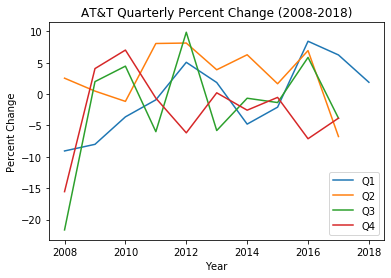

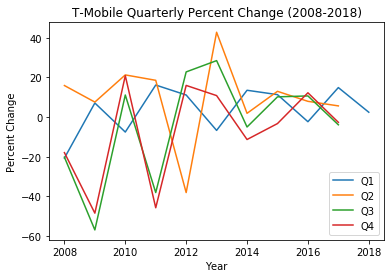

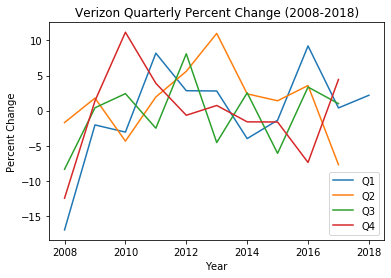

In [176]:
# AT&T Graphing the quarterly percent change to compare them

plt.plot(quar_per_change_att['Year'], quar_per_change_att['Quarter1'], label='Q1')
plt.plot(quar_per_change_att['Year'], quar_per_change_att['Quarter2'], label='Q2')
plt.plot(quar_per_change_att['Year'], quar_per_change_att['Quarter3'], label='Q3')
plt.plot(quar_per_change_att['Year'], quar_per_change_att['Quarter4'], label='Q4')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('AT&T Quarterly Percent Change (2008-2018)')
plt.legend()
plt.show()


# T MOBILE Graphing the quarterly percent change to compare them

plt.plot(quar_per_change_tmob['Year'], quar_per_change_tmob['Quarter1'], label='Q1')
plt.plot(quar_per_change_tmob['Year'], quar_per_change_tmob['Quarter2'], label='Q2')
plt.plot(quar_per_change_tmob['Year'], quar_per_change_tmob['Quarter3'], label='Q3')
plt.plot(quar_per_change_tmob['Year'], quar_per_change_tmob['Quarter4'], label='Q4')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('T-Mobile Quarterly Percent Change (2008-2018)')
plt.legend()
plt.show()


# VERIZON Graphing the quarterly percent change to compare them

plt.plot(quar_per_change_ver['Year'], quar_per_change_ver['Quarter1'], label='Q1')
plt.plot(quar_per_change_ver['Year'], quar_per_change_ver['Quarter2'], label='Q2')
plt.plot(quar_per_change_ver['Year'], quar_per_change_ver['Quarter3'], label='Q3')
plt.plot(quar_per_change_ver['Year'], quar_per_change_ver['Quarter4'], label='Q4')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('Verizon Quarterly Percent Change (2008-2018)')
plt.legend()
plt.savefig('Graphs/seasonal.png')

plt.show()


### Analysis on Quarterly Percent Change : 
#### The data and graphs show us there there are no quarters that show significant peaks or that lead an investor to make short term investment decisions. The fluctuations in price don't seem to be related to the time of year. 
#### At&t quarter 2 seems to have the highest rate throughout the years. It is the only quarter that shows less fluctuations. 
#### T Mobile shows less fluctuations in Quarter 1 but it's percent change is severe. 
#### Verzion has no obvious pattern from these graphs. 

### Compare Quarterly Price and Volume for all three companies

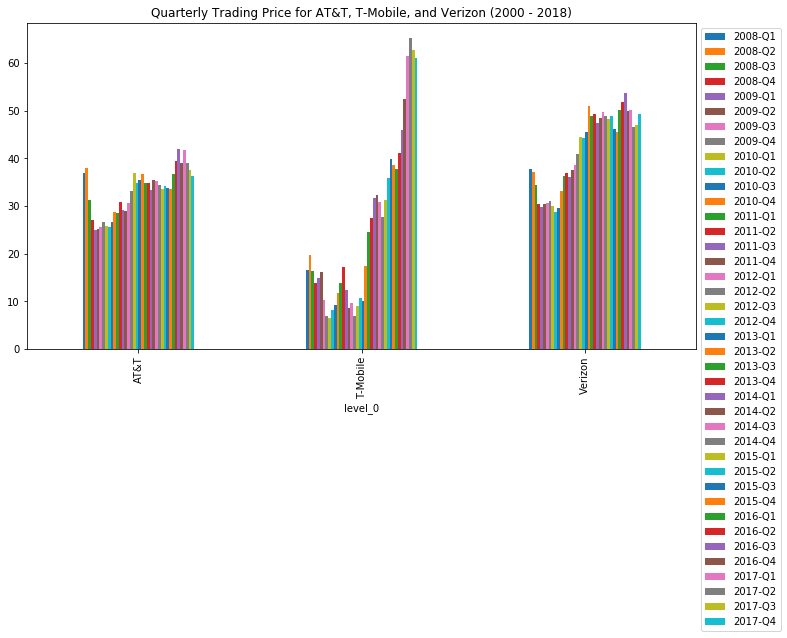

In [177]:
# Filter data between 2008 and 2018
limit_date1 = combined_df[(combined_df['Date'] >= '2008-01-01') & (combined_df['Date'] < '2018-01-01')]

# Group by level_0 and Quarters and calculate mean of Volume
price_quart1 = limit_date1.groupby(['level_0', 'Quarters'])['Close'].mean().unstack()

# Plot the quarterly volume data for all companies using a bar plot
fig, ax = plt.subplots(figsize=(12,6))
price_quart1.plot(kind='bar', ax=ax, title='Quarterly Trading Price for AT&T, T-Mobile, and Verizon (2000 - 2018)')
ax.legend(bbox_to_anchor=(1, 1))

plt.show()


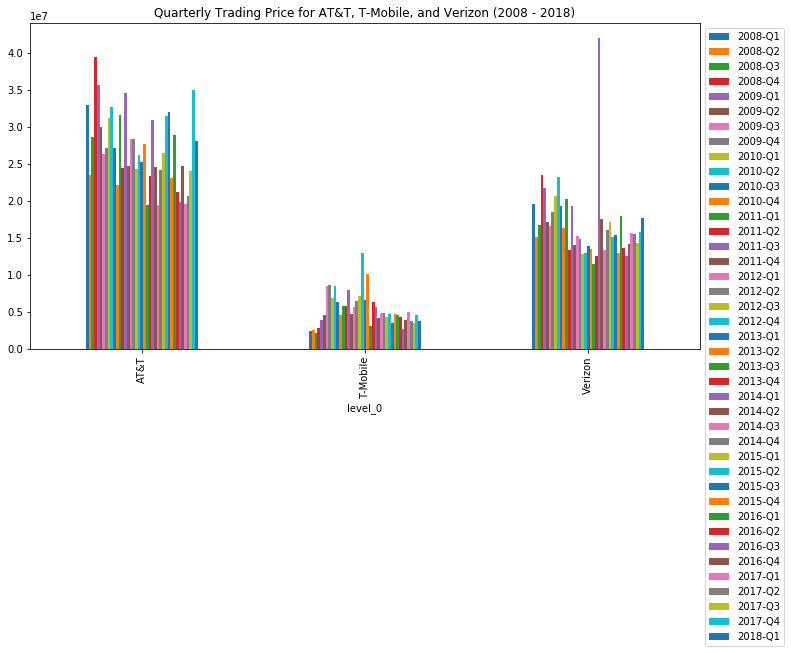

In [178]:
# Filter data between 2008 and 2018
limit_date2 = combined_df[(combined_df['Date'] >= '2008-01-01') & (combined_df['Date'] < '2019-01-01')]

# Group by level_0 and Quarters and calculate mean of Volume
vol_quart1 = limit_date2.groupby(['level_0', 'Quarters'])['Volume'].mean().unstack()

# Plot the quarterly volume data for all companies using a bar plot
fig, ax = plt.subplots(figsize=(12,6))
vol_quart1.plot(kind='bar', ax=ax, title='Quarterly Trading Price for AT&T, T-Mobile, and Verizon (2008 - 2018)')
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('Graphs/volver.png')
plt.show()

####  Analysis: For the last 10 years we see some more detail for each company:
#### - The fourth quarter of 2008, AT&T reaches its speak in volume 

#### - The fourth quarter of 2012, T mobile is showing a spike and also it's peak in those 10 years. 

#### - And the first quarter of 2014 Verizon looks like it has an outlier

# -7- What is the correlation between price and volume for each company 

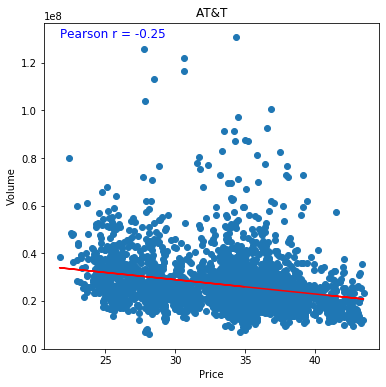

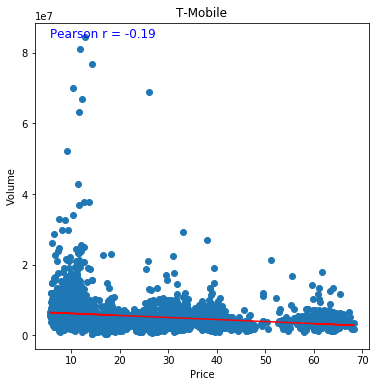

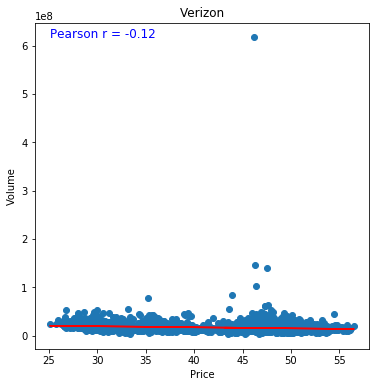

In [179]:
# Pearson Correlation
# In order to caluclate it for each company we should defind a function that runs the euqation,
## and then applying it to each company

def scatter_reg_corr(df, title):
    # Calculate Pearson correlation coefficient and p-value
    corr, pval = pearsonr(df['Volume'], df['Close'])
    # Calculate slope and intercept for linear regression line
    slope, intercept, r_value, p_value, std_err = linregress(df['Close'], df['Volume'])
    # Create scatter plot with linear regression line and Pearson correlation coefficient
    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(df['Close'], df['Volume'])
    ax.plot(df['Close'], slope*df['Close']+intercept, color='red')
    ax.set_title(title)
    ax.set_xlabel('Price')
    ax.set_ylabel('Volume')
    ax.text(df['Close'].min(), df['Volume'].max()-2, f'Pearson r = {corr:.2f}', fontsize=12, color='blue')
    plt.show()

# Create scatter plot with linear regression line and Pearson correlation coefficient for each company
scatter_reg_corr(volprice_group.get_group('AT&T'), 'AT&T')
scatter_reg_corr(volprice_group.get_group('T-Mobile'), 'T-Mobile')
scatter_reg_corr(volprice_group.get_group('Verizon'), 'Verizon')

## Analysis: 
### AT&T as price increases volume increases there is a moderately stonge negative correlation here. 
### T-Mobile has a very weak correlation between volume and price 
### Verizon also has a weak correlation with several outliers.

### Exploring the Verizon outlier in Quarter 1 of 2014

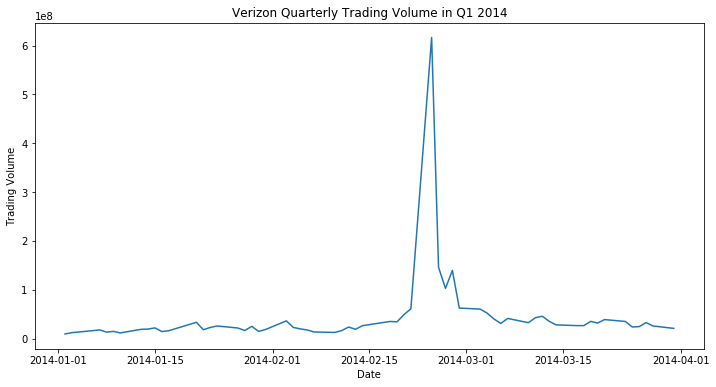

In [180]:
# Filter the new dataset to only see data from Verizon and dates from the first quarter of 2014
verizon_q1_2014 = combined_df_10[(combined_df_10['level_0'] == 'Verizon') & (combined_df_10['Date'].dt.quarter == 1) & (combined_df_10['Date'].dt.year == 2014)]

# Line graph on trading volume for Verizon: Q1 2014
plt.figure(figsize=(12, 6))
plt.plot(verizon_q1_2014['Date'], verizon_q1_2014['Volume'])
plt.title('Verizon Quarterly Trading Volume in Q1 2014')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()



#### Verizon Q1 Analysis
#### It appears the outlier is specifically at the end of February beginning of March. If this data is accurate, according to research, Verizon aquired Vodafone at this time. It used proceeds from capital market transactions that it accured in Sept 2013 and Feb 2014 as well as $6.6 billion borrowed feb 21 2014. This could account for such a peak in it's stock volume at this time therefore ignoreable. 

### Exploring T-Mobile Q4 2012

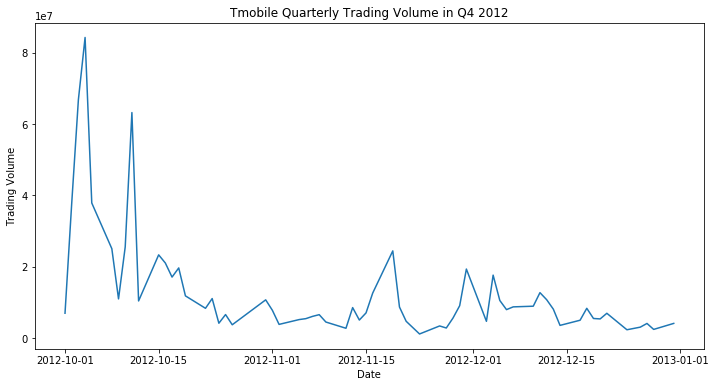

In [181]:
#Exploring the outlier for TMobile

# Filter the new dataset to only see data from Verizon and dates from the first quarter of 2014
tmob_q4_2012 = combined_df_10[(combined_df_10['level_0'] == 'T-Mobile') & (combined_df_10['Date'].dt.quarter == 4) & (combined_df_10['Date'].dt.year == 2012)]

# Line graph on trading volume for Verizon: Q1 2014
plt.figure(figsize=(12, 6))
plt.plot(tmob_q4_2012['Date'], tmob_q4_2012['Volume'])
plt.title('Tmobile Quarterly Trading Volume in Q4 2012')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()



## T Mobile launched it's 4G LTE network around this time. This may be the reason for volume peaks in the last quarter of 2012 for T-Mobile. 

### Exploring the outlier for AT&T Q4 2008


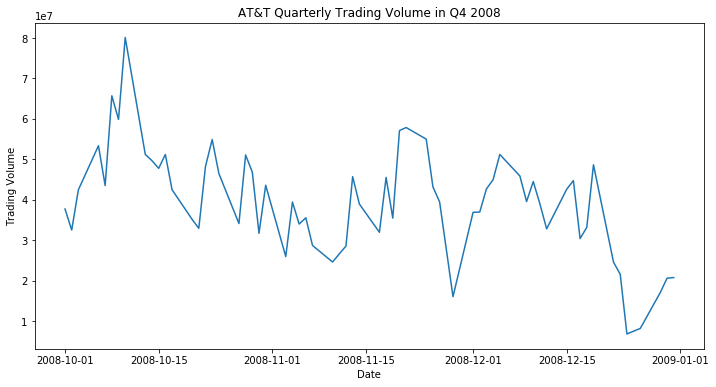

In [182]:
# Filter the new dataset to only see data from Verizon and dates from the first quarter of 2014
att_q4_2008 = combined_df_10[(combined_df_10['level_0'] == 'AT&T') & (combined_df_10['Date'].dt.quarter == 4) & (combined_df_10['Date'].dt.year == 2008)]

# Line graph on trading volume for Verizon: Q1 2014
plt.figure(figsize=(12, 6))
plt.plot(att_q4_2008['Date'], att_q4_2008['Volume'])
plt.title('AT&T Quarterly Trading Volume in Q4 2008')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


## AT&T released several new products and services at this time such as smartphones and new wireless plans.

##### However it is important to note that the peaks and dips are natural volume fluctuations due to the price of the stock and do not neccessarily indicate any external factor influences.  Volume alone also doesn't provide us with too much knowledge about the well being of the stock. It is important to look at the financial reports to get a better idea.


## -8- What is the P/E Ratio for each company?

    Price-to-Earnings ratio is a metric usually used in stock analysis. It helps investors understand the value of a stock and see if it's overvalued or undervalued. 
          - The P/E ratio calculation is: the current market price of a stock / earnings per share (EPS).

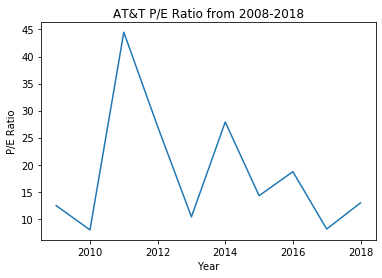

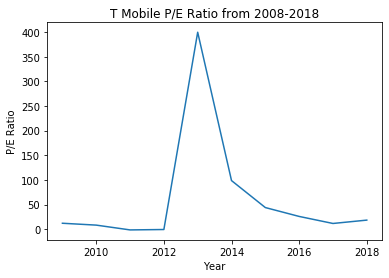

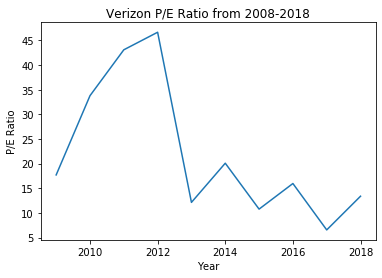

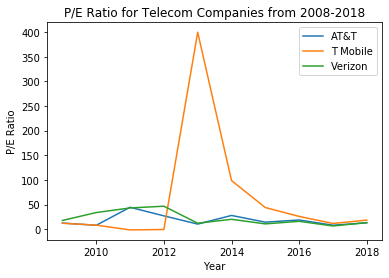

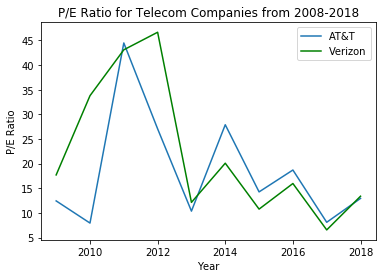

In [263]:
att_eps = pd.read_csv('Output_data/ATT_EPScsv.csv', delimiter=';')
att_eps['Date'] = pd.to_datetime(att_eps['Date'], format='%d/%m/%y')
att_eps['Year'] = att_eps['Date'].dt.year

# Loc the year and Level_0
combined_df2 = combined_df.loc[(combined_df['level_0'] == 'AT&T') & (combined_df['Year'] >= 2008) & (combined_df['Year'] <= 2018)]

# Group combined_df by Year and calculate the mean of Close column
yearly_close = combined_df2.groupby('Year')['Close'].mean().reset_index()

# Merge yearly_close and att_eps on Year column
merged_df = pd.merge(yearly_close, att_eps, on='Year', how='left')

# Calculate P/E ratio 
merged_df['PE Ratio'] = merged_df['Close'] / merged_df['Basic EPS']
merged_df



# Plot the P/E ratio over time
plt.plot(merged_df['Year'], merged_df['PE Ratio'])

# Add title and axis labels
plt.title('AT&T P/E Ratio from 2008-2018')
plt.xlabel('Year')
plt.ylabel('P/E Ratio')

# Show the plot
plt.show()



#T MOB

tmus_eps = pd.read_csv('Output_data/TMUS_EPScsv.csv', delimiter=';')
tmus_eps['Date'] = pd.to_datetime(tmus_eps['Date'], format='%d/%m/%y')
tmus_eps['Year'] = tmus_eps['Date'].dt.year

# Loc the year and Level_0
combined_df3 = combined_df.loc[(combined_df['level_0'] == 'T-Mobile') & (combined_df['Year'] >= 2008) & (combined_df['Year'] <= 2018)]

# Group combined_df by Year and get the mean of Close column
yearly_close1 = combined_df3.groupby('Year')['Close'].mean().reset_index()

# Merge yearly_close and tmus_eps on Year column
merged_df1 = pd.merge(yearly_close1, tmus_eps, on='Year', how='left')

# Calculate P/E ratio
merged_df1['PE Ratio'] = merged_df1['Close'] / merged_df1['Basic EPS']
merged_df1



# Plot the P/E ratio over time
plt.plot(merged_df1['Year'], merged_df1['PE Ratio'])

# Add title and axis labels
plt.title('T Mobile P/E Ratio from 2008-2018')
plt.xlabel('Year')
plt.ylabel('P/E Ratio')

# Show the plot
plt.show()



# VER

ver_eps = pd.read_csv('Output_data/VZ_EPScsv.csv', delimiter=';')
ver_eps['Date'] = pd.to_datetime(ver_eps['Date'], format='%d/%m/%y')
ver_eps['Year'] = ver_eps['Date'].dt.year

# Loc the year and Level_0
combined_df4 = combined_df.loc[(combined_df['level_0'] == 'Verizon') & (combined_df['Year'] >= 2008) & (combined_df['Year'] <= 2018)]

# Group combined_df by Year and get the mean of Close column
yearly_close2 = combined_df4.groupby('Year')['Close'].mean().reset_index()

# Merge yearly_close and ver_eps on Year column
merged_df2 = pd.merge(yearly_close2, ver_eps, on='Year', how='left')

# Calculation of P/E ratio 
merged_df2['PE Ratio'] = merged_df2['Close'] / merged_df2['Basic EPS']
merged_df2



# Plot the P/E ratio over time
plt.plot(merged_df2['Year'], merged_df2['PE Ratio'])

# Add title and axis labels
plt.title('Verizon P/E Ratio from 2008-2018')
plt.xlabel('Year')
plt.ylabel('P/E Ratio')

# Show the plot
plt.show()

#All in one graph

plt.plot(merged_df['Year'], merged_df['PE Ratio'], label='AT&T')
plt.plot(merged_df1['Year'], merged_df1['PE Ratio'], label='T Mobile')
plt.plot(merged_df2['Year'], merged_df2['PE Ratio'], label='Verizon')

# Add title and axis labels
plt.title('P/E Ratio for Telecom Companies from 2008-2018')
plt.xlabel('Year')
plt.ylabel('P/E Ratio')

# Add legend
plt.legend()

# Show the plot
plt.show()


#Only Verizon and ATT
plt.plot(merged_df['Year'], merged_df['PE Ratio'], label='AT&T', color='#1f77b4')
#plt.plot(merged_df1['Year'], merged_df1['PE Ratio'], label='T Mobile')
plt.plot(merged_df2['Year'], merged_df2['PE Ratio'], label='Verizon', color='green')

# Add title and axis labels
plt.title('P/E Ratio for Telecom Companies from 2008-2018')
plt.xlabel('Year')
plt.ylabel('P/E Ratio')

# Add legend
plt.legend()

# Show the plot
plt.show()


#### Analysis: Companies with higher P/E ratios indicate that the company is overvalued. It could mean that investors are willing to pay more each dollar made by the company. In this case, T-Mobile in 2013 had a significantly higher PE Ratio compared to the industry average. This indicates that investors had very high expectations for the companies future earnings growth. The market was willing to pay 400 times the EPS to own a share of the company. The fact that it was a one time peak and shot back down is a bad inditication meaning that the expectations were not met or that in 2013 there was an unusual event that occured. 
#### Companies with a lower PE ratios indicate that investers are getting more stable deals on each dollar of earnings made. This could also mean the investors are not expecting a lot of future growth. However in 2011 for both Verizon and AT&T there were peaks in the ratio indicating there was a shift in the industry overvaluing the companies. 

#### Analysis on P/E Ratio 
Several factors can cause the P/E ratio to increase:

Increase in stock price: Since it's a ratio, if the price increases and the EPS stays the same, the ratio will increase. But as we saw earlier, the prices in 2011 were not increasing too much to lend a reason for this PE Ratio spike. 

Decrease in earnings: If it's not the price, then maybe AT&T and Verizon have a decrease in EPS while the prices of stock were the same. And it does appear that in those years, the EPS were decreasing as the price remained the same or slightly increased. 


# Final Thoughts and Results

#### Based on the data provided and the analysis made, ATT and Verizon appear to be more stable and consistent in terms of their stock price and volume. They also consistently offer dividends, which can be attractive to investors seeking regular income. In contrast, T Mobile has experienced severe fluctuations in both price and volume and has offered high dividends for only one year in the available data. Moreover, ATT has the highest average trading volume over the most recent two years, making it the most liquid of the three companies. 
#### We could advise an investor to consider including AT&T to their portfolio, however, it's important to note that past performance is not a guarantee of future results, and in order to get a better idea of where to invest,  we should consider various factors such as company financials, industry trends, and potential risks.


# ..........................................................................................................

# Additional information for personal use.

## Taking a deeper dive into the comapanies independently

## AT&T

### Volume

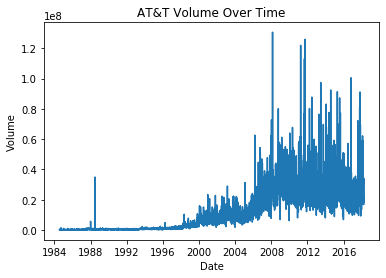

In [189]:
plt.plot(att1["Date"], att["Volume"])
plt.title("AT&T Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

Notice the spike around the year 1988. 

### Price

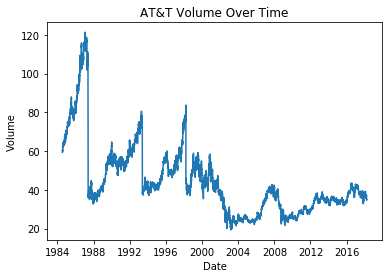

In [190]:
plt.plot(att1["Date"], att1["Close"])
plt.title("AT&T Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

###  A deeper look into 1988: An Instance of Volume Movement Preceding Price Movement 

In [191]:
att_1988 = att1[(att1["Date"].dt.year >= 1988) & (att1["Date"].dt.year <= 1995)]

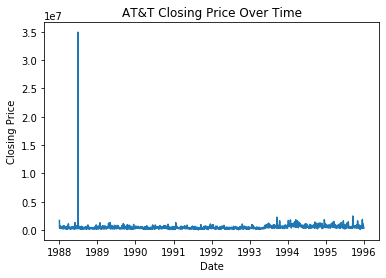

In [192]:
plt.plot(att_1988["Date"], att_1988['Volume'])
plt.title("AT&T Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

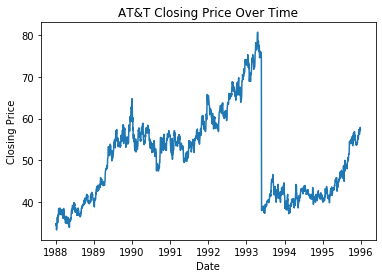

In [193]:
plt.plot(att_1988["Date"], att_1988['Close'])
plt.title("AT&T Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

### Quarterly Analysis

In [194]:
# Set the date column as the index
att1.set_index('Date', inplace=True)

# Resample the data quarterly and calculate the mean price for each quarter
att_quarterly = att1.resample('Q').mean()

# Select the data for the recent 5 years
att_quarterly = att_quarterly.loc['2016-01-01':'2021-12-31']

# Reset the index
att_quarterly = att_quarterly.reset_index()

# Display the first few rows of the DataFrame
att_quarterly.head()

Date  Unnamed: 0       Open       High        Low      Close  \
0 2016-03-31       530.0  36.571967  36.874825  36.340759  36.670820   
1 2016-06-30       467.5  39.334609  39.578755  39.126641  39.401250   
2 2016-09-30       403.5  41.862500  42.085469  41.563922  41.847031   
3 2016-12-31       340.0  38.957460  39.328113  38.774762  39.068254   
4 2017-03-31       277.5  41.644839  41.864500  41.408334  41.665968   

         Volume  Ex-Dividend  Split Ratio  Adj. Open  Adj. High   Adj. Low  \
0  2.888697e+07     0.007869          1.0  33.574112  33.852135  33.361831   
1  2.125395e+07     0.007500          1.0  36.553584  36.780469  36.360287   
2  1.991083e+07     0.007500          1.0  39.344408  39.553955  39.063783   
3  2.466348e+07     0.007619          1.0  37.061274  37.413943  36.887605   
4  1.956849e+07     0.007903          1.0  40.080370  40.291823  39.852748   

   Adj. Close   Adj. Volume  
0   33.664793  2.888697e+07  
1   36.615463  2.125395e+07  
2   39.329880  1.991083e+07  
3   37.166840  2.466348e+07  
4   40.100724  1.956849e+07

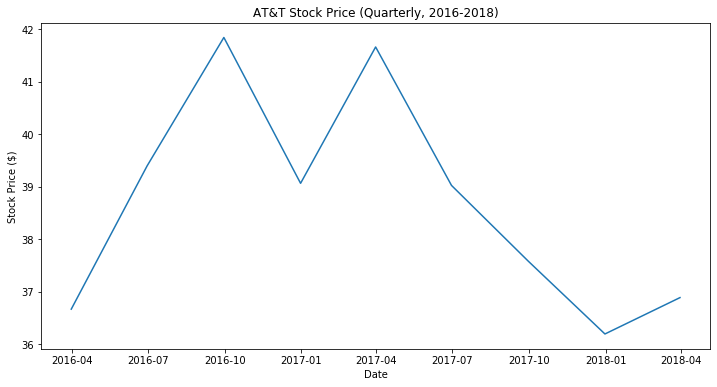

In [195]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the line chart
plt.plot(att_quarterly['Date'], att_quarterly['Close'])

# Set the title and axis labels
plt.title('AT&T Stock Price (Quarterly, 2016-2018)')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

# Show the plot
plt.show()

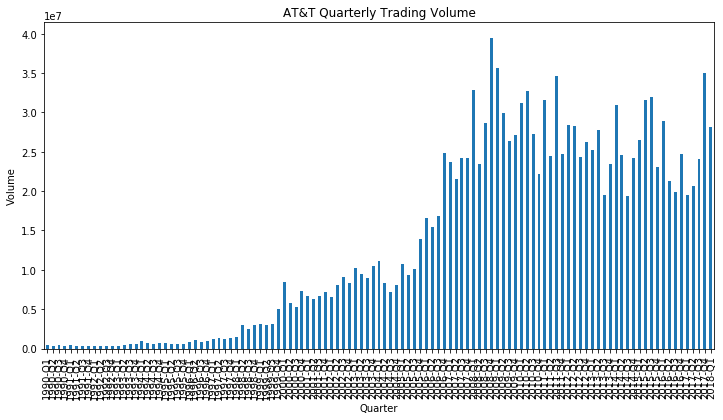

In [196]:
# Plotting bar chart of quarterly volume data for AT&T
volume_quarterly_all.loc['AT&T'].plot(kind='bar', figsize=(12,6), title='AT&T Quarterly Trading Volume')
plt.xlabel('Quarter')
plt.ylabel('Volume')
plt.show()



#### We see some peaks at the start of Q4 in 1988. But mainly we see the upwards trend in volume for AT&T starting at around the start of 2000s

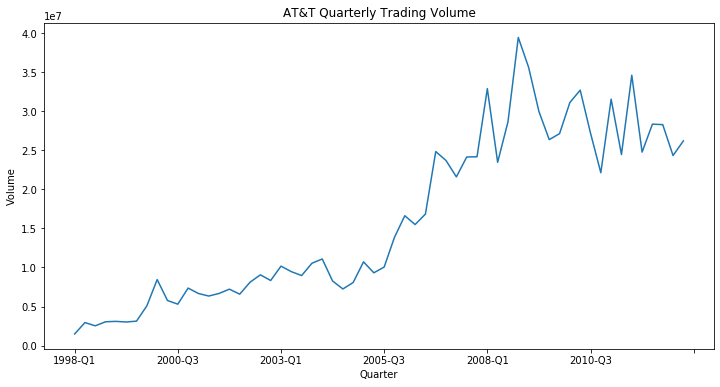

In [197]:
# Filtering between 1980 and 2000
combined_80_00 = combined_df[(combined_df['Date'] >= '1998-01-01') & (combined_df['Date'] < '2013-01-01')]

# Groupby level_0 and Quarters to calculate average of Volume
vol_quart_8000 = combined_80_00.groupby(['level_0', 'Quarters'])['Volume'].mean().unstack()


vol_quart_8000.loc['AT&T'].plot(kind='line', figsize=(12,6), title='AT&T Quarterly Trading Volume')
plt.xlabel('Quarter')
plt.ylabel('Volume')
plt.show()

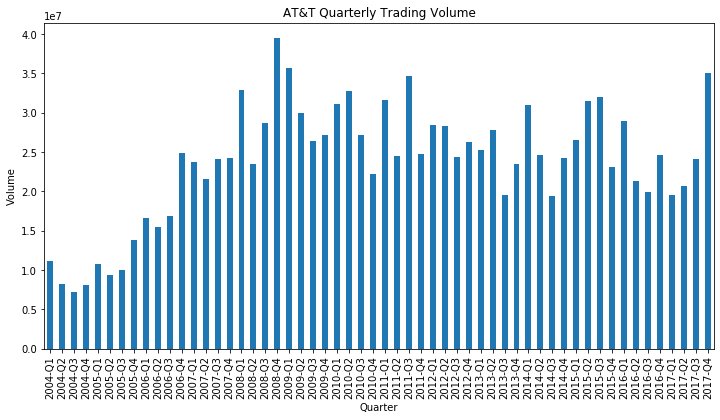

In [198]:
# Filtering  between 2004 and 2018
combined_04_18 = combined_df[(combined_df['Date'] >= '2004-01-01') & (combined_df['Date'] < '2018-01-01')]

# Groupby level_0 and Quarters to calculate average of Volume
vol_quart_0418 = combined_04_18.groupby(['level_0', 'Quarters'])['Volume'].mean().unstack()


vol_quart_0418.loc['AT&T'].plot(kind='bar', figsize=(12,6), title='AT&T Quarterly Trading Volume')
plt.xlabel('Quarter')
plt.ylabel('Volume')
plt.show()

#### AT&T definetly had it's greatest peaks in volume starting in Q4 of 2008 and didn't match it again until Q4 2017 almost 10 years later. 

## T Mobile

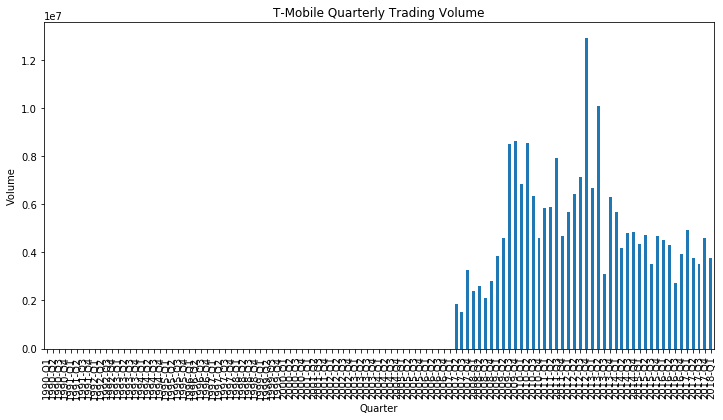

In [199]:
# Plotting bar chart of quarterly volume data for AT&T
volume_quarterly_all.loc['T-Mobile'].plot(kind='bar', figsize=(12,6), title='T-Mobile Quarterly Trading Volume')
plt.xlabel('Quarter')
plt.ylabel('Volume')
plt.show()


Looks like there is a lot of missing data compared to the other companies

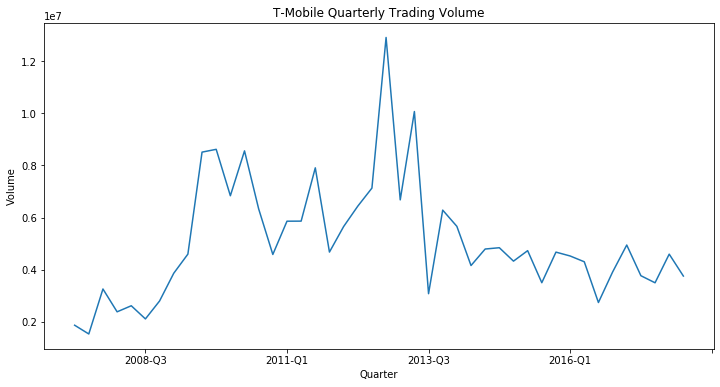

In [200]:
# Filtering between 2006 and 2018
tm_06_18 = combined_df[(combined_df['Date'] >= '2006-01-01') & (combined_df['Date'] < '2019-01-01')]

# Groupby level_0 and Quarters to calculate average of Volume
tmvol_qua_0618 = tm_06_18.groupby(['level_0', 'Quarters'])['Volume'].mean().unstack()


tmvol_qua_0618.loc['T-Mobile'].plot(kind='line', figsize=(12,6), title='T-Mobile Quarterly Trading Volume')
plt.xlabel('Quarter')
plt.ylabel('Volume')
plt.show()

There is no volume data before 2007 making it more difficult to analyze T Mobile compared to its competitors.

### Volume

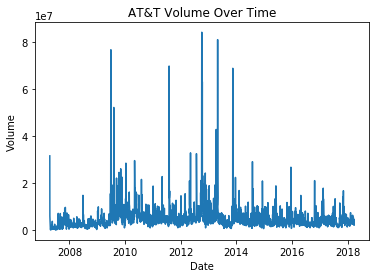

In [202]:
plt.plot(t_mobile1["Date"], t_mobile1["Volume"])
plt.title("AT&T Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

### Price

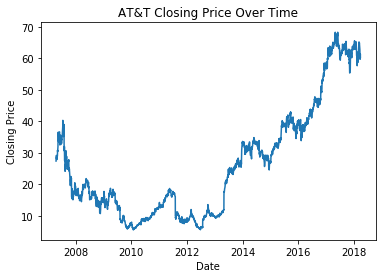

In [203]:
plt.plot(t_mobile1["Date"], t_mobile1["Close"])
plt.title("AT&T Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

### Another Instance of Volume Movement Preceding Price Movement

Note that, in the volume plot above, there were spikes in volume in 2009, 2011, 2012, and 2013 and that there was a rise in price for the following years in the next plot. 

### Quarterly Analysis

In [204]:
# Set the date column as the index
t_mobile1.set_index('Date', inplace=True)

# Resample the data quarterly and calculate the mean price for each quarter
tm_quarterly = t_mobile1.resample('Q').mean()

# Select the data for the recent 5 years
tm_quarterly = tm_quarterly.loc['2016-01-01':'2021-12-31']

# Reset the index
tm_quarterly = tm_quarterly.reset_index()

# Display the first few rows of the DataFrame
display(tm_quarterly.head())

Date       Open       High        Low      Close        Volume  \
0 2016-03-31  37.805410  38.312049  37.098115  37.749836  4.527204e+06   
1 2016-06-30  40.862812  41.380483  40.508423  41.008984  4.305100e+06   
2 2016-09-30  45.903906  46.322227  45.466628  45.909531  2.741945e+06   
3 2016-12-31  52.170317  52.808997  51.698816  52.324365  3.910348e+06   
4 2017-03-31  61.320484  62.059661  60.704284  61.472823  4.946769e+06   

   Ex-Dividend  Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
0          0.0          1.0  37.805410  38.312049  37.098115   37.749836   
1          0.0          1.0  40.862812  41.380483  40.508423   41.008984   
2          0.0          1.0  45.903906  46.322227  45.466628   45.909531   
3          0.0          1.0  52.170317  52.808997  51.698816   52.324365   
4          0.0          1.0  61.320484  62.059661  60.704284   61.472823   

    Adj. Volume  
0  4.527204e+06  
1  4.305100e+06  
2  2.741945e+06  
3  3.910348e+06  
4  4.946769e+06

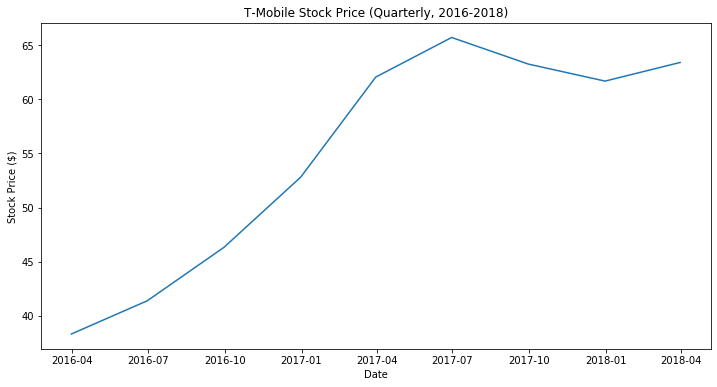

In [205]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the line chart
plt.plot(tm_quarterly['Date'], tm_quarterly['High'])

# Set the title and axis labels
plt.title('T-Mobile Stock Price (Quarterly, 2016-2018)')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

# Show the plot
plt.show()

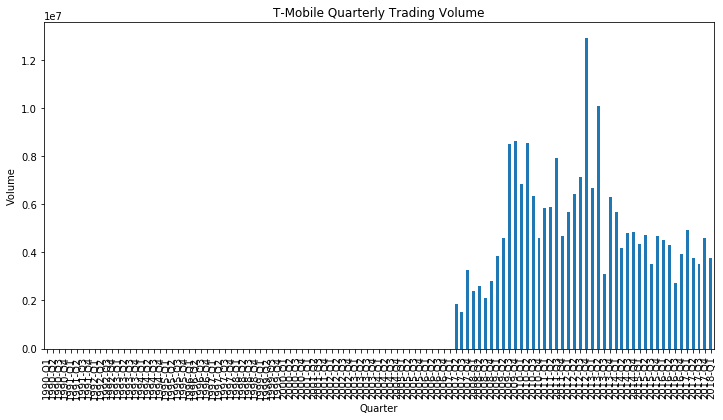

In [206]:
# Plotting bar chart of quarterly volume data for AT&T
volume_quarterly_all.loc['T-Mobile'].plot(kind='bar', figsize=(12,6), title='T-Mobile Quarterly Trading Volume')
plt.xlabel('Quarter')
plt.ylabel('Volume')
plt.show()


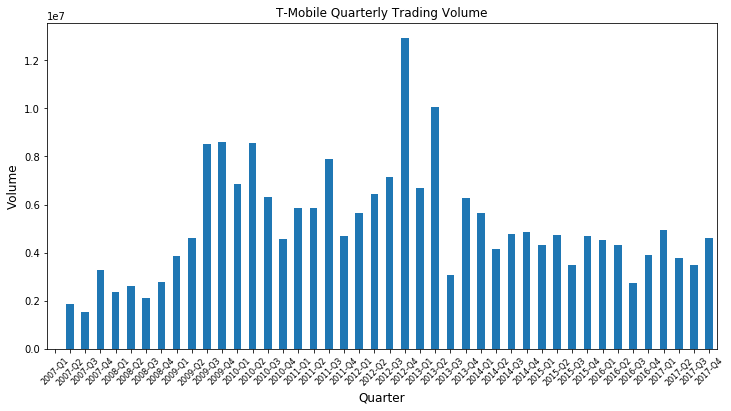

In [207]:
# Starting with stock volume origination
start_date = '2007-01'
end_date = '2018-04'
data = volume_quarterly_all.loc['T-Mobile'][start_date:end_date]

# Bar Chart
ax = data.plot(kind='bar', figsize=(12,6), title='T-Mobile Quarterly Trading Volume')
ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Volume', fontsize=12)
ax.tick_params(axis='x', labelrotation=45, labelsize=8)

plt.show()


Looks like there is a lot of missing data compared to the other companies

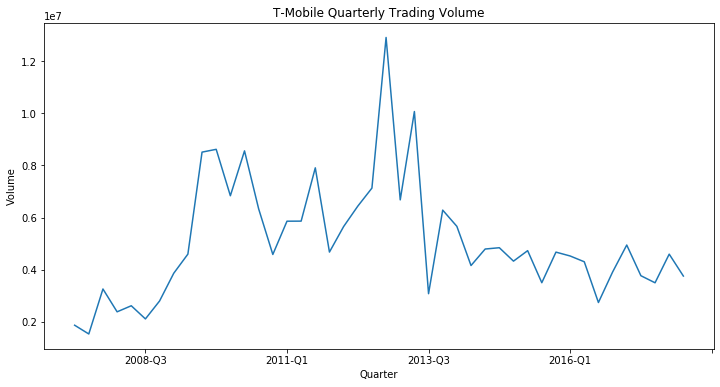

In [208]:
# Filtering between 2006 and 2018
tm_06_18 = combined_df[(combined_df['Date'] >= '2006-01-01') & (combined_df['Date'] < '2019-01-01')]

# Groupby level_0 and Quarters to calculate average of Volume
tmvol_qua_0618 = tm_06_18.groupby(['level_0', 'Quarters'])['Volume'].mean().unstack()


tmvol_qua_0618.loc['T-Mobile'].plot(kind='line', figsize=(12,6), title='T-Mobile Quarterly Trading Volume')
plt.xlabel('Quarter')
plt.ylabel('Volume')
plt.show()

There is no volume data before 2007 making it more difficult to analyze T Mobile compared to its competitors.

## Verizon

### Volume

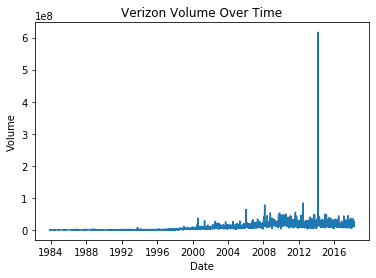

In [210]:
plt.plot(verizon1["Date"], verizon1["Volume"])
plt.title("Verizon Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

### Price

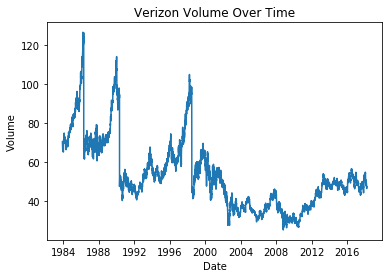

In [211]:
plt.plot(verizon1["Date"], verizon1["Close"])
plt.title("Verizon Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

### Average High Per Year

### Quarterly Analysis

In [212]:
# Convert the date column to datetime format
verizon1['Date'] = pd.to_datetime(verizon1['Date'])

# Set the date column as the index
verizon1.set_index('Date', inplace=True)

# Resample the data quarterly and calculate the mean price for each quarter
vz_quarterly = verizon1.resample('Q').mean()

# Select the data for the recent 5 years
vz_quarterly = vz_quarterly.loc['2016-01-01':'2021-12-31']

# Reset the index
vz_quarterly = vz_quarterly.reset_index()

# Display the first few rows of the DataFrame
display(vz_quarterly.head())

Date       Open       High        Low      Close        Volume  \
0 2016-03-31  49.858361  50.294567  49.490861  50.014262  1.793030e+07   
1 2016-06-30  51.808375  52.145919  51.461944  51.869063  1.365343e+07   
2 2016-09-30  53.730391  53.997711  53.334333  53.670313  1.257006e+07   
3 2016-12-31  49.963016  50.304635  49.628525  49.978095  1.411764e+07   
4 2017-03-31  50.183790  50.448466  49.867661  50.170323  1.568193e+07   

   Ex-Dividend  Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
0     0.009262          1.0  47.194635  47.607578  46.846807   47.342166   
1     0.008828          1.0  49.551277  49.874081  49.219907   49.609226   
2     0.008828          1.0  51.915264  52.173476  51.532500   51.857108   
3     0.009167          1.0  48.827323  49.161219  48.500492   48.842148   
4     0.009306          1.0  49.565040  49.826426  49.252792   49.551654   

    Adj. Volume  
0  1.793030e+07  
1  1.365343e+07  
2  1.257006e+07  
3  1.411764e+07  
4  1.568193e+07

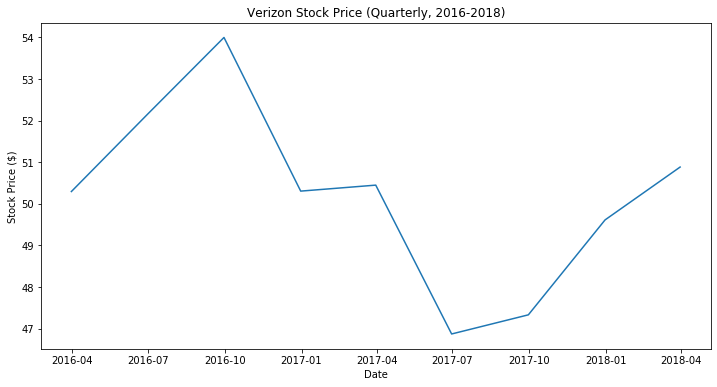

In [213]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the line chart
plt.plot(vz_quarterly['Date'], vz_quarterly['High'])

# Set the title and axis labels
plt.title('Verizon Stock Price (Quarterly, 2016-2018)')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

# Show the plot
plt.show()

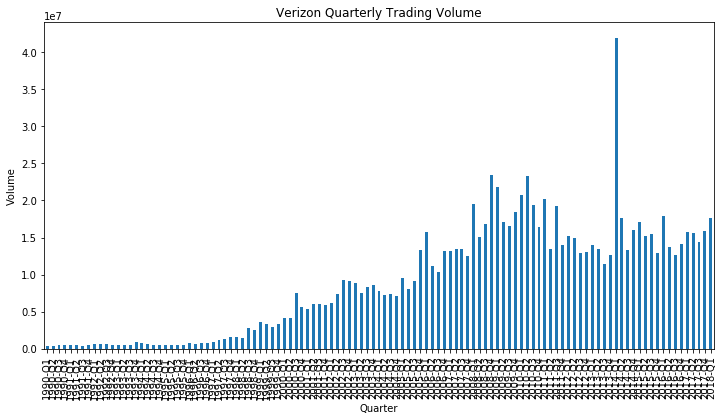

In [214]:
# Plotting bar chart of quarterly volume data for Verizon
volume_quarterly_all.loc['Verizon'].plot(kind='bar', figsize=(12,6), title='Verizon Quarterly Trading Volume')
plt.xlabel('Quarter')
plt.ylabel('Volume')
plt.show()


Lets take a closer look at the growth

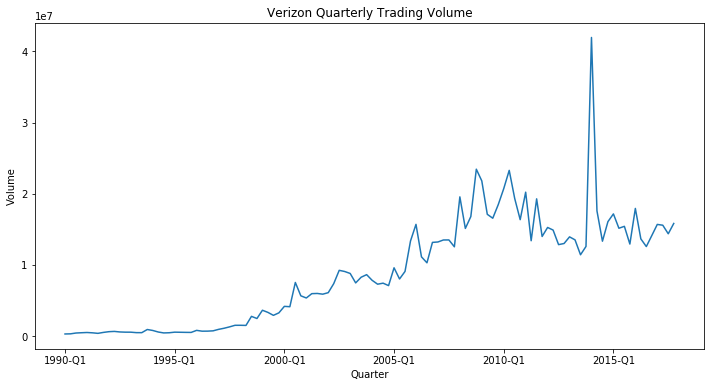

In [215]:
# Filtering between 2006 and 2018
v_80_00 = combined_df[(combined_df['Date'] >= '1990-01-01') & (combined_df['Date'] < '2018-01-01')]

# Groupby level_0 and Quarters to calculate average of Volume
vvol_qua_8000 = v_80_00.groupby(['level_0', 'Quarters'])['Volume'].mean().unstack()


vvol_qua_8000.loc['Verizon'].plot(kind='line', figsize=(12,6), title='Verizon Quarterly Trading Volume')
plt.xlabel('Quarter')
plt.ylabel('Volume')
plt.show()

Verizons growth starts in the first quarter of 2000 and peaks heavily at the earlier analyzed last quarter of 2014.